In [ ]:
plot "my data.csv"
f(x)=m*x + b
fit f(x) "my data.csv" using 1:2:3 via m,b
replot f(x)

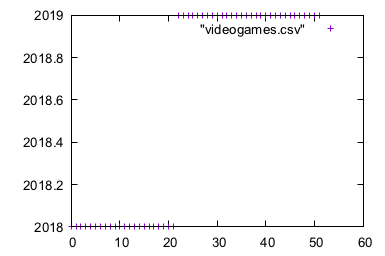

In [2]:
plot "videogames.csv" 

In [ ]:
set ticslevel 0
splot (x)*(y)